# UBER DATA VISUALISATION

# Taking in consideration of all the dataset and visualizing them.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import dataset from local folder using pandas read_csv function
data=pd.read_csv(r"C:\Users\abhig\Downloads\merge_from_ofoct.csv")

# Preprocessing of Data

In [3]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [4]:
data.tail() 

,Date/Time,Lat,Lon,Base
4451741,2014-09-30 22:57:00,40.7668,-73.9845,B02764
4451742,2014-09-30 22:57:00,40.6911,-74.1773,B02764
4451743,2014-09-30 22:58:00,40.8519,-73.9319,B02764
4451744,2014-09-30 22:58:00,40.7081,-74.0066,B02764
4451745,2014-09-30 22:58:00,40.7140,-73.9496,B02764


In [5]:
print(data.Base.value_counts())#count no. of rides done by different cabs.

B02617    1417983
B02598    1379578
B02682    1198901
B02764     254931
B02512     200353
Name: Base, dtype: int64


In [6]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)#function to add date of month
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)#function to add day of week

def get_hour(dt):
    return dt.hour


data['hour'] = data['Date/Time'].map(get_hour)#function to add hour of day

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
4451741,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
4451742,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
4451743,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
4451744,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
4451745,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


In [7]:
data['weekday']=data['weekday'].replace(0,'Sun')
data['weekday']=data['weekday'].replace(1,'Mon')
data['weekday']=data['weekday'].replace(2,'Tue')
data['weekday']=data['weekday'].replace(3,'Wed')
data['weekday']=data['weekday'].replace(4,'Thur')
data['weekday']=data['weekday'].replace(5,'Fri')
data['weekday']=data['weekday'].replace(6,'Sat')
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,Wed,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,Wed,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,Wed,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,1,Wed,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,1,Wed,0


# Visualisation of total no. of rides per day in all the months combined

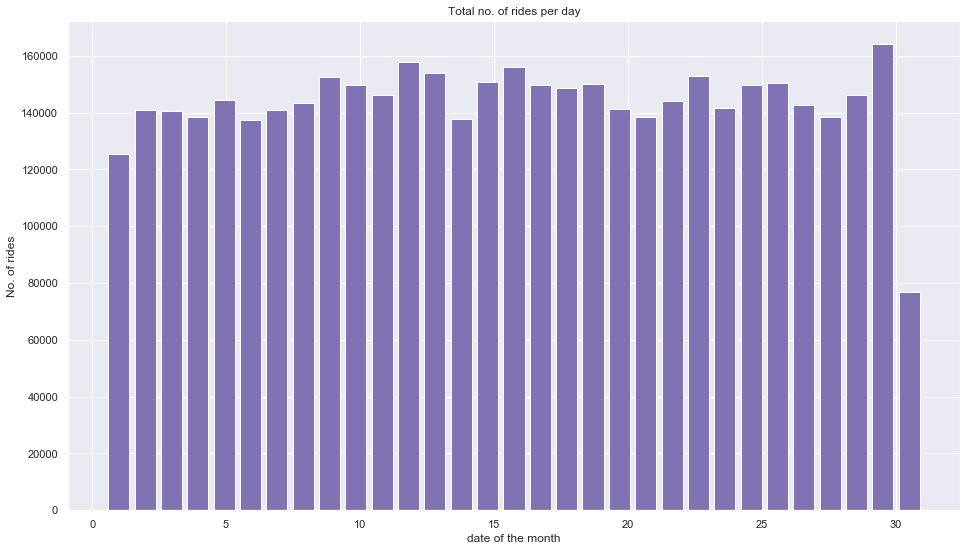

In [13]:
figure(figsize=(16, 9))
plt.hist(data.dom, bins=31, rwidth=.8, range=(0.5, 31),color='m')#hist is a matplot library to plot histogram
xlabel('date of the month')
ylabel('No. of rides')
title('Total no. of rides per day')
plt.show()

# Visualisation of total no. of rides on each day of week in all the months combined

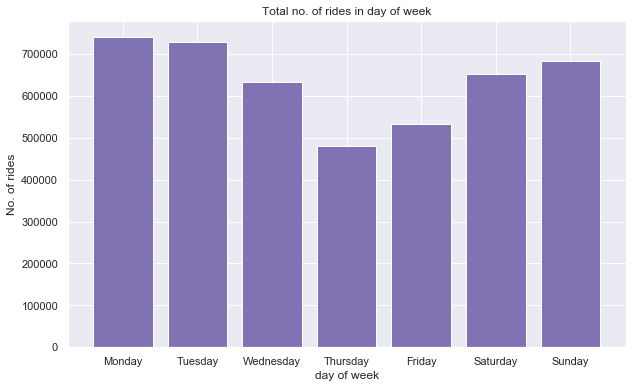

In [14]:
figure(figsize=(10, 6))#figure is used to resize the image
plt.hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8,color='m')
xticks(range(7), 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split())# labels of the x-axis
xlabel('day of week')
ylabel('No. of rides')
plt.title("Total no. of rides in day of week")
plt.show()#used to show the figure

# Visualisation of total no. of rides on each hour of day in all the months combined

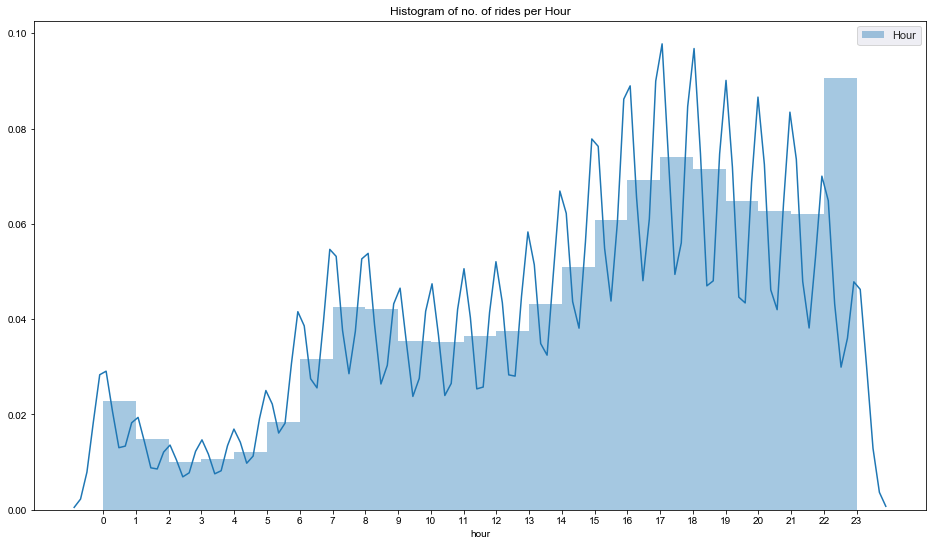

In [10]:
bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.figure(figsize=(16,9))
sns.distplot(data["hour"],label="Hour",bins=bins)#distplot is used to plot histogram
plt.xticks(bins) # set bins value
sns.set() # for style
plt.title("Histogram of no. of rides per Hour") # for histogram title
plt.legend() # for label

# Visualisation of loction of cabs based on their latitude and longitude in all the months combined

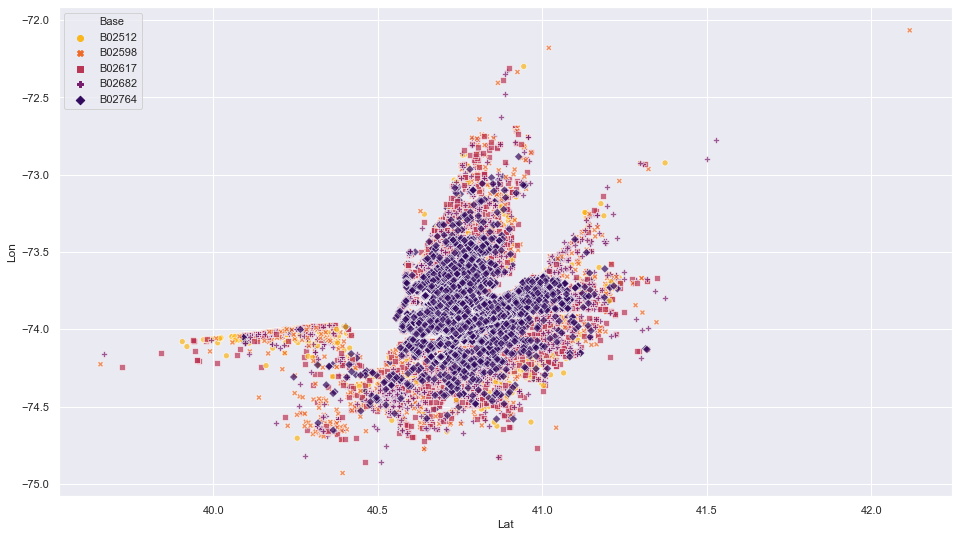

In [11]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='Lat',y='Lon',data=data,hue='Base',style="Base",sizes=(100,200),palette="inferno_r",alpha=.7)
#alpha is used to change transparency of points
#palette is used to change the color of the seaborn scatterplot
#sizes is used to change size of points
#style is used to change the order of style levels
#hue is used to change hue categorical data order

# Visualisation of percentage of rides done by different cabs in all the months combined using Piechart

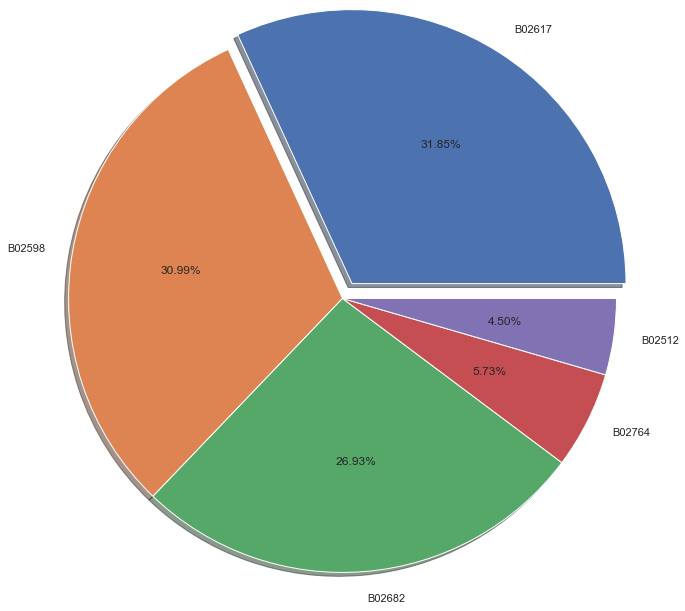

In [12]:
plt.figure(figsize=(16,9))
cab=["B02617","B02598","B02682","B02764","B02512"]
rides=[1417983,1379578,1198901,254931,200353]
explode=[0.09,0,0,0,0]
plt.pie(rides,labels=cab,explode=explode,autopct = "%0.2f%%",radius=1.4,shadow = True)
plt.show()
#explode is used to divide the pie chart
#autopct is used to show the percentage of each part
#radius is used to change the radius of pie chart
#shadow is used to add shadows